# UNDERSTANDING THE PROBLEM

   The purpose of this project is to demonstrate my understanding of a machine learning project life cycle, my analysis skills, my programming skills.
   
  This project uses the dataset which comes from a hypothetical telecommunication services company including records of more than 2000 customers.

 The project goal is to build a machine learning classification model to predict whether or not a customer is likely to cancel their services based on features such as: Customer usage, customer services call, customer charge, State.
 
 The target variable is Churn, which is encoded as 'yes','no'. Our interest class is 'yes'.
 
The evaluation metrics are confusion metrics( precision, recall), F1-score. Assuming that the cost to acquire a new customer is higher than retaining a potential churn customer, the model aims to obtains high recall rate or minimize the false negative rate.


# SET UP

In [92]:
import pandas as pd
import numpy as np
import sys
import inspect
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
pd.options.display.max_rows=999
pd.options.display.max_columns=999
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

This dataset is a Cellular Usage Data set consists of records of actual phone numbers and feature of interest, such as VM, international calling, service cost, customer's usage, and whether or not customer cancels the service.

# DATA EXPLORATION

In [94]:
data=pd.read_csv('churn.csv')

In [95]:
data.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

###### Check for missing values, duplication

In [97]:
data.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

Phone number is the unique identifier for each customer. Confirm that there are no duplicate records in the dataset.

In [98]:
data.Phone.nunique()

3333

No missing values nor duplications

###### Inspect Target Variable


In [99]:
data.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [100]:
data.Churn.value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

There are 483 customers have cancelled the services amongst 3333 customers. Let's explore in details.

In [101]:
data.groupby('Churn').mean()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
yes,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805


In [102]:
data.groupby('Churn').std()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,39.88235,13.913125,50.181655,50.292175,51.105032,2.784489,1.163883,19.801157,8.530835,19.958414,4.274863,19.506246,2.299768,2.441984,0.751784,42.306156
yes,39.46782,11.860138,68.997792,51.728910,47.132825,2.793190,1.853275,21.582307,11.729710,19.724711,4.396762,19.950659,2.121081,2.551575,0.754152,42.792270


Churner preliminary profile:
- Churners makes more call to customer services center than non-churners.
- Churners have higher usage than non-churners, thus, higher charge.

In [103]:
churn_count = data.groupby('State')['Churn'].value_counts()
account_by_state=data.groupby('State').size()
churn_rate=churn_count/account_by_state

In [104]:
churn_count.unstack().yes.sort_values(ascending=False).head(10)

State
TX    18
NJ    18
MD    17
MI    16
NY    15
MN    15
MS    14
MT    14
WA    14
SC    14
Name: yes, dtype: int64

In [105]:
account_by_state.sort_values(ascending=False).head(10)

State
WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
dtype: int64

In [106]:
churn_rate.unstack().yes.sort_values(ascending=False).head(10)

State
CA    0.264706
NJ    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: yes, dtype: float64

Though California is not the state that have the largest customer base, it is one of the 2 states that has the highest churn rate.
New Jersey is another state that has the highest churn rate.

# DATA VISUALIZATION

###### Target Class

<AxesSubplot:>

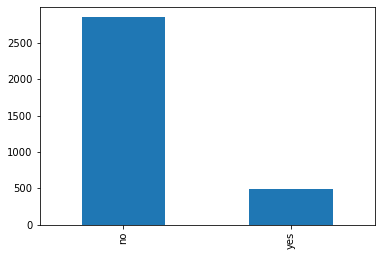

In [107]:
data.Churn.value_counts().plot(kind='bar')

This is an imbalance class case when the number of non-churners are much higher than churners.

###### Numerical variables vs. Target Class

In [108]:
cols_to_visualize=data.select_dtypes(exclude='object').columns

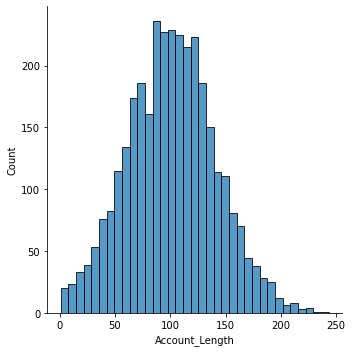

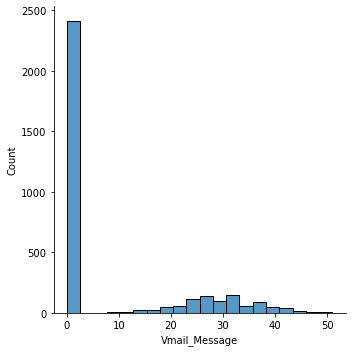

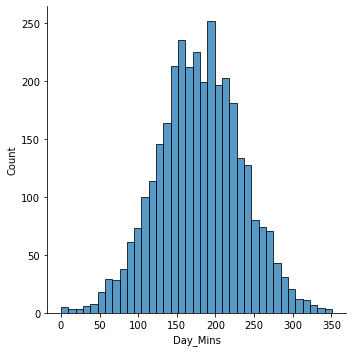

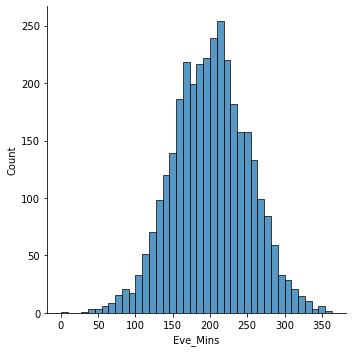

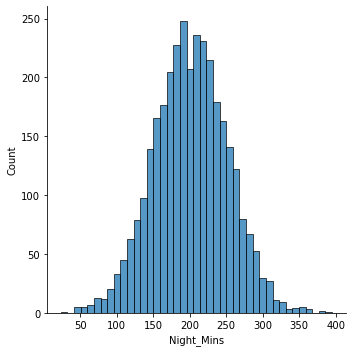

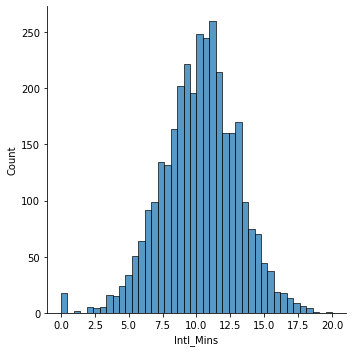

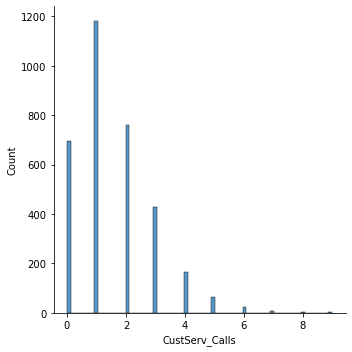

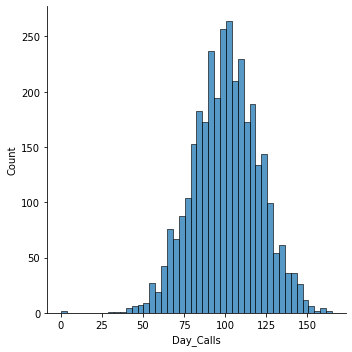

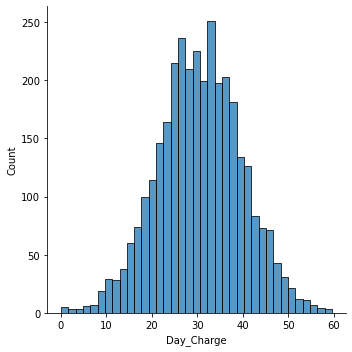

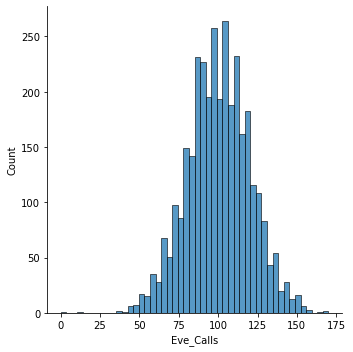

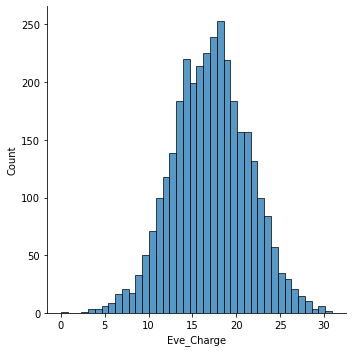

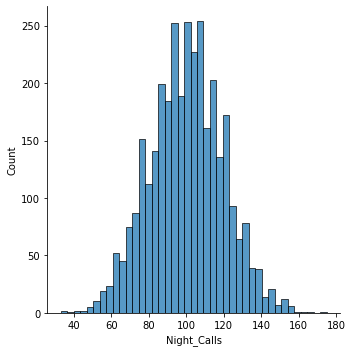

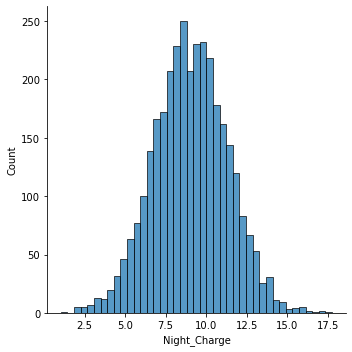

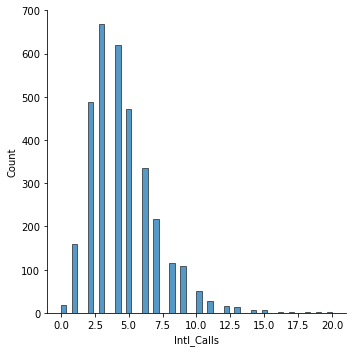

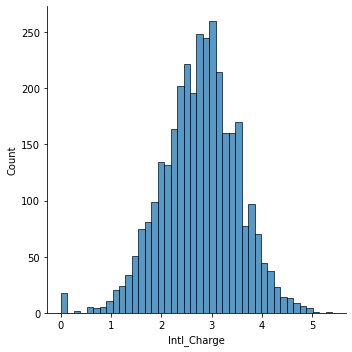

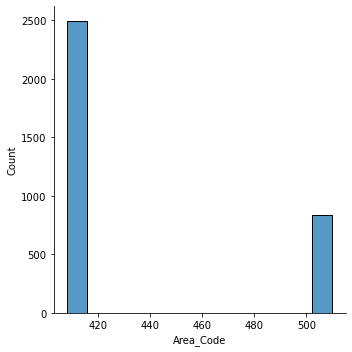

In [109]:
for col in cols_to_visualize:
    sns.displot(x=col,data=data)
    plt.show()

Features such as Day_Mins, Eve_Mins, Night_Mins, Intl_Mins are normally distributed.

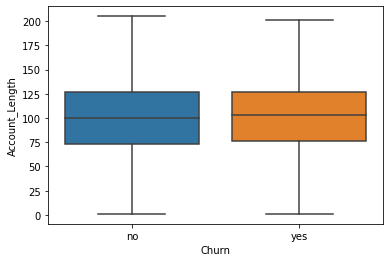

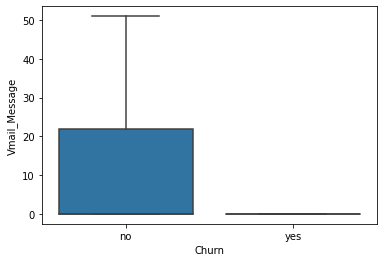

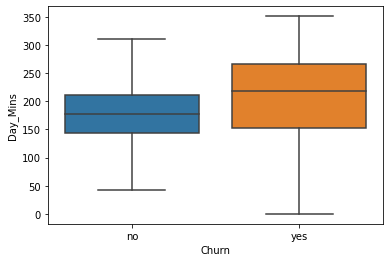

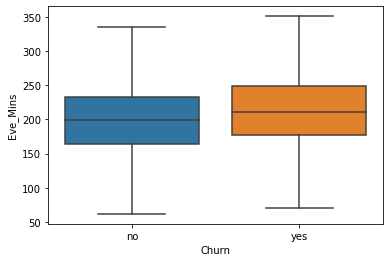

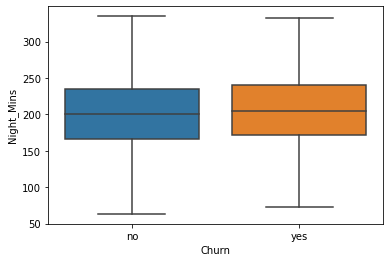

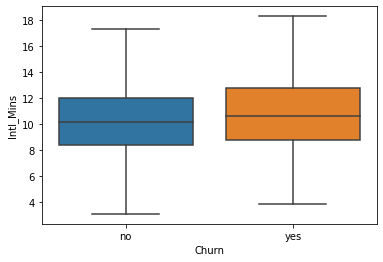

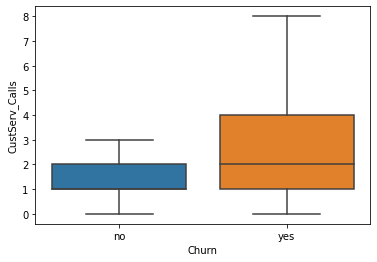

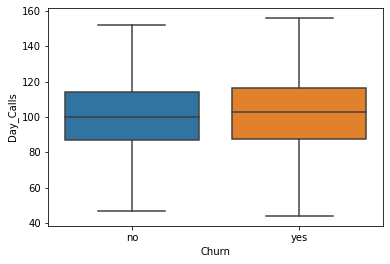

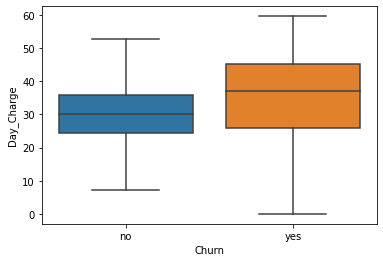

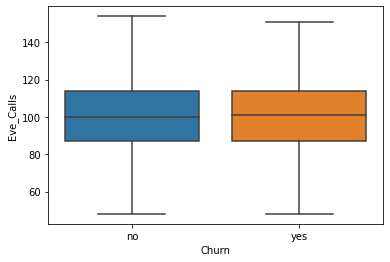

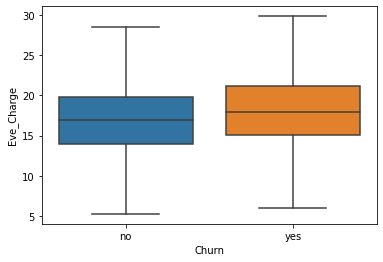

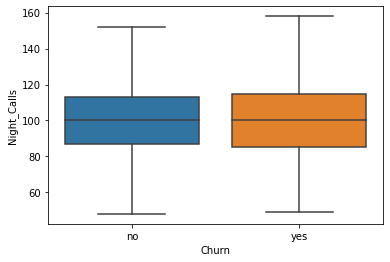

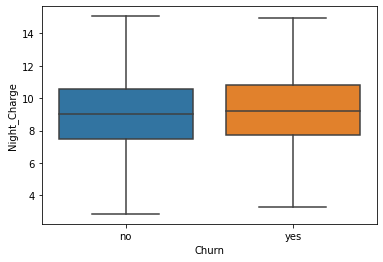

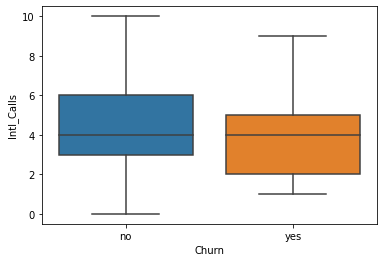

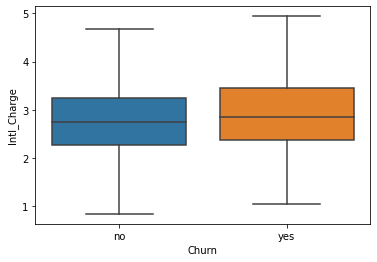

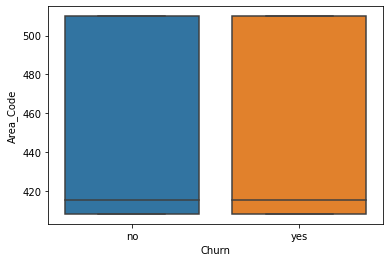

In [110]:
for col in cols_to_visualize:
    sns.boxplot(x='Churn', y=col,data=data, sym="")
    plt.show()

- Churners seem to use the phone services more often than non-churners, especially during the day.
- Churners place more calls to customer services center than non-churners before cancelling the services.

# FEATURE ENGINEERING

Phone number is unique and does not provide any predictive porwer to the model. Thus, Phone number will be dropped.
Area code provides geographical information which has been substibuted by States. Hence, will be dropped.

In [111]:
data.drop(['Phone','Area_Code'],axis=1,inplace=True)

In [112]:
mins_use=pd.Series(data.Day_Mins+data.Eve_Mins+data.Night_Mins)
data['mins_use']=mins_use
data.groupby('Churn')['mins_use'].mean()

Churn
no     574.352246
yes    624.555901
Name: mins_use, dtype: float64

In [113]:
customer_value=pd.Series(data.Day_Charge+data.Eve_Charge+data.Night_Charge+data.Intl_Charge)
data['customer_value']=customer_value
data.groupby('Churn')['customer_value'].std()

Churn
no      9.458436
yes    13.885268
Name: customer_value, dtype: float64

In [114]:
charge_rate=pd.Series(customer_value/mins_use)
data['charge_rate']=charge_rate
data.groupby('Churn')['charge_rate'].mean()

Churn
no     0.101833
yes    0.104161
Name: charge_rate, dtype: float64

It can clearly be seen that:
- Customer who cancels the cellular service plan have higher value the non-churn customer,$7 more on average. 
- The churners also use their phone services a lot more often, 50 more mins on average.
- However, even though they use more, high usage customers pay the same rate as the less-usage customers.

# DATA PREPROCESSING

In [115]:
data.select_dtypes(exclude='object').describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,mins_use,customer_value,charge_rate
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,581.627483,59.449754,0.102170
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,89.969330,10.502261,0.008650
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,275.200000,22.930000,0.068138
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,521.000000,52.380000,0.096545
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,583.100000,59.470000,0.102148
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,642.500000,66.480000,0.107862
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,876.900000,96.150000,0.133682


In [116]:
data[data.dtypes[data.dtypes=='object'].index].head()

,Churn,Intl_Plan,Vmail_Plan,State
0,no,no,yes,KS
1,no,no,yes,OH
2,no,no,no,NJ
3,no,yes,no,OH
4,no,yes,no,OK


- We are going to replace [yes, no] to [1,0] for Churn, Intl_Plan and Vmail_Plan
- State variable will be encoded using one hot encoding

In [117]:
df=pd.DataFrame()

In [118]:
df['Churn']=data['Churn'].replace({'no':0,'yes':1})
df['Intl_Plan']=data['Intl_Plan'].replace({'no':0,'yes':1})
df['Vmail_Plan']=data['Vmail_Plan'].replace({'no':0,'yes':1})

In [119]:
encoded_state=pd.get_dummies(data.State)

In [120]:
encoded_state=pd.DataFrame(encoded_state)

In [121]:
df=pd.concat([df,encoded_state],axis=1)

In [122]:
df.describe()

,Churn,Intl_Plan,Vmail_Plan,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,0.096910,0.276628,0.015602,0.024002,0.016502,0.019202,0.010201,0.019802,0.022202,0.016202,0.018302,0.018902,0.016202,0.015902,0.013201,0.021902,0.017402,0.021302,0.021002,0.017702,0.015302,0.019502,0.021002,0.018602,0.021902,0.025203,0.018902,0.019502,0.020402,0.020402,0.018602,0.018302,0.016802,0.020402,0.018602,0.019802,0.024902,0.023402,0.018302,0.023402,0.013501,0.019502,0.018002,0.018002,0.015902,0.021602,0.021602,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102
std,0.352067,0.295879,0.447398,0.123947,0.153079,0.127414,0.137255,0.100499,0.139340,0.147363,0.126269,0.134061,0.136199,0.126269,0.125114,0.114153,0.146386,0.130782,0.144411,0.143413,0.131885,0.122768,0.138302,0.143413,0.135134,0.146386,0.156763,0.136199,0.138302,0.141392,0.141392,0.135134,0.134061,0.128547,0.141392,0.135134,0.139340,0.155851,0.151200,0.134061,0.151200,0.115426,0.138302,0.132978,0.132978,0.125114,0.145402,0.145402,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00

In [123]:
num_feature=data.select_dtypes(exclude='object')
num_feature.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,mins_use,customer_value,charge_rate
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,581.627483,59.449754,0.102170
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,89.969330,10.502261,0.008650
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,275.200000,22.930000,0.068138
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,521.000000,52.380000,0.096545
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,583.100000,59.470000,0.102148
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,642.500000,66.480000,0.107862
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,876.900000,96.150000,0.133682


- Area Code has 3 unique values and usually represents the regions the number belong to, in this case, State has already indicates the geographical feature. Thus, Area Code will be dropped.
- Different data features have different scale. It is important to make sure all features have the same scale to avoid bias in modeling.

In [124]:
num_cols=num_feature.columns

In [125]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
scale=MinMaxScaler()

In [127]:
num_feature=scale.fit_transform(num_feature)
num_feature_df=pd.DataFrame(num_feature,columns=num_cols)

In [128]:
df=pd.concat([num_feature_df,df],axis=1)

In [129]:
y=df.pop('Churn')
X=df

# MODEL TRAINNING

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from numpy import mean
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

In [131]:
rfc=RandomForestClassifier(random_state=0)
dtc=DecisionTreeClassifier(random_state=0)

In [132]:
over_sampler=RandomOverSampler()
under_sampler=RandomUnderSampler(sampling_strategy='majority')

In [133]:
def pipeline(sampler,model):
    steps = [('sampler', sampler), ('model', model)]
    pipeline=Pipeline(steps=steps)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('F1 Score: %.3f' % score)

###### OverSampling

In [134]:
pipeline(over_sampler,dtc)

F1 Score: 0.952


In [135]:
pipeline(over_sampler,rfc)

F1 Score: 0.968


###### Undersampling

In [136]:
pipeline(under_sampler,dtc)

F1 Score: 0.851


In [137]:
pipeline(under_sampler,rfc)

F1 Score: 0.967


RandomForestClassifier gives higher score using Over Sampling Method. Thus, we are going to tune its hyperparameter to improve the model performance.

###### Hyperparameter Tuning

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
def get_sample(sampler,X,y):
    X_sampling,y_sampling=sampler.fit_resample(X,y)
    X_train,X_test,y_train,y_test=train_test_split(X_sampling,y_sampling,test_size=0.3)
    return X_train,X_test,y_train,y_test

In [155]:
def model_fit(model,X_train,y_train):
    return model.fit(X_train,y_train)

In [156]:
def tuned_model(model,param_grid,X_train,y_train):
    grid_search=GridSearchCV(model, param_grid)
    tuned_model = model_fit(grid_search,X_train,y_train)
    print(tuned_model.best_params_)
    return tuned_model

In [157]:
# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [161]:
 def model_predict_eval(model,sampler,X,y, param_grid):
    X_train,X_test,y_train,y_test=get_sample(sampler,X,y)
    final_model= tuned_model(model, param_grid,X_train, y_train)
    y_pred=final_model.predict(X_test)
    print('F1 Score %.3f'%f1_score(y_test,y_pred))
    plot_confusion_matrix(final_model, X_test, y_test,cmap=plt.cm.Blues)
    plt.show()
    importances=final_model.best_estimator_.feature_importances_
    importance_df=pd.DataFrame(importances,index=X.columns,columns=['Importance_Ranking'])
    top10=importance_df.sort_values(by=['Importance_Ranking'],ascending=True).tail(10)
    top10.plot(y='Importance_Ranking',kind='barh')
    plt.show()
    return y_pred

###### Prediction Results

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}
F1 Score 0.997


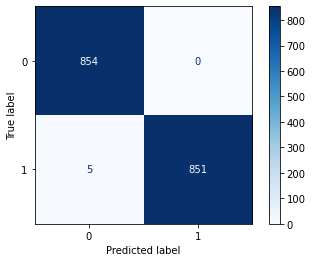

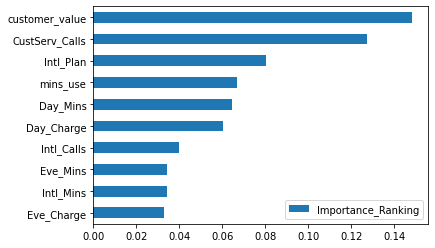

In [162]:
y_pred=model_predict_eval(rfc,over_sampler,X,y,param_grid)

# CONCLUSION

- Spotting unsatisifed customers is essential to business.
- In this case, it is clear that usage customer is more likely to churn.
- Churners call customer services more often than non-churners before deciding to cancel the services.

Assuming that the cost to acquire new customer is high, it is highly recommended to provide incentive(bulk offer) to high usage customer , and closely monitor customer services call to ensure service quality and improve training.
